In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
rankings_data=pd.read_csv("ranking_data.csv")

In [4]:
rankings_data.columns

Index([u'CSA2010', u'Number of Homes Sold (2010)',
       u'Number of Homes Sold (2011)', u'Number of Homes Sold (2012)',
       u'Number of Homes Sold (2013)', u'Number of Homes Sold (2014)',
       u'Median Price of Homes Sold (2010)',
       u'Median Price of Homes Sold (2011)',
       u'Median Price of Homes Sold (2012)',
       u'Median Price of Homes Sold (2013)',
       u'Median Price of Homes Sold (2014)',
       u'Median Number of Days on the Market (2010)',
       u'Median Number of Days on the Market (2011)',
       u'Median Number of Days on the Market (2012)',
       u'Median Number of Days on the Market (2013)',
       u'Median Number of Days on the Market (2014)',
       u'Percentage of Housing Units that are Owner-Occupied (2010)',
       u'Percentage of Housing Units that are Owner-Occupied (2011)',
       u'Percentage of Housing Units that are Owner-Occupied (2012)',
       u'Percentage of Housing Units that are Owner-Occupied (2013)',
       u'Percentage of Housing U

In [5]:
rankings_data = rankings_data[rankings_data.CSA2010 != "Baltimore City"]

In [6]:
rankings_data=rankings_data.dropna()

In [7]:
comm=rankings_data["CSA2010"]
median_price=list(rankings_data["Median Price of Homes Sold (2014)"])

In [8]:
median_price=[i.replace("$", "") for i in median_price]
median_price=[i.replace(",", "") for i in median_price]
median_price=[float(i) for i in median_price]
median_tom=rankings_data["Median Number of Days on the Market (2014)"]

In [9]:
ranks_1=pd.DataFrame()

In [10]:
ranks_1["Neighbourhood"]=pd.Series(comm)
ranks_1["MedianHousePrice"]=pd.Series(median_price)
ranks_1["MedianTOM"]=pd.Series(median_tom)

In [11]:
price_mean=ranks_1["MedianTOM"].mean()
std_tom=[-1*(i-price_mean) for i in ranks_1["MedianTOM"]]

In [12]:
ranks_1["TOM Deviations"]=std_tom

## 

In [87]:
ranks_1_ranked=ranks_1.sort_values(["TOM Deviations"],ascending=False)
ranks_1_ranked.to_csv("Ranking 1.csv")
ranks_1_ranked.head(10)

,Neighbourhood,MedianHousePrice,MedianTOM,TOM Deviations,Dev Score
47,South Baltimore,289900.0,23,19.745455,12.604348
45,Poppleton/The Terraces/Hollins Market,73600.0,27,15.745455,2.725926
29,Inner Harbor/Federal Hill,320000.0,28,14.745455,11.428571
35,Midway/Coldstream,17005.0,28,14.745455,0.607321
42,Patterson Park North & East,172000.0,28,14.745455,6.142857
33,Medfield/Hampden/Woodberry/Remington,175000.0,29,13.745455,6.034483
54,Westport/Mount Winans/Lakeland,35500.0,30,12.745455,1.183333
4,Canton,275000.0,30,12.745455,9.166667
52,Upton/Druid Heights,71202.0,31,11.745455,2.296839
9,Clifton-Berea,20000.0,32,10.745455,0.625000


In [14]:
score=[]
for i in range(0,len(ranks_1["MedianHousePrice"])):
    score.append(ranks_1["MedianHousePrice"][i]/ranks_1["MedianTOM"][i])
score=[i/1000 for i in score]
ranks_1["Dev Score"]=pd.Series(score)

In [88]:
ranks_ranked2=ranks_1.sort_values("Dev Score",ascending=False)

ranks_ranked2.to_csv("ranks_hotness.csv")
ranks_ranked2.head(10)

,Neighbourhood,MedianHousePrice,MedianTOM,TOM Deviations,Dev Score
47,South Baltimore,289900.0,23,19.745455,12.604348
29,Inner Harbor/Federal Hill,320000.0,28,14.745455,11.428571
38,North Baltimore/Guilford/Homeland,325000.0,33,9.745455,9.848485
4,Canton,275000.0,30,12.745455,9.166667
21,Greater Roland Park/Poplar Hill,310000.0,36,6.745455,8.611111
37,Mount Washington/Coldspring,287000.0,34,8.745455,8.441176
15,Fells Point,249000.0,33,9.745455,7.545455
27,Highlandtown,265000.0,41,1.745455,6.463415
42,Patterson Park North & East,172000.0,28,14.745455,6.142857
34,Midtown,200000.0,33,9.745455,6.060606


In [16]:
ranks2=pd.DataFrame()

In [17]:
pop05=rankings_data["Percent of Population 0-5 years old (2010)"]
pop618=rankings_data["Percent of Population 6-18 years old (2010)"]
pop2564=rankings_data["Percent of Population 25-64 years old (2010)"]
race_div=rankings_data["Racial Diversity Index (2010)"]

In [18]:
ranks2["Neighbourhood"]=pd.Series(comm)
ranks2["Pop05"]=pd.Series(pop05)
ranks2["MedianTOM"]=pd.Series(median_tom)
ranks2["Pop618"]=pd.Series(pop618)
ranks2["Pop2564"]=pd.Series(pop2564)
ranks2["Diversity Index"]=pd.Series(race_div)

In [19]:
ranks2.head(3)

,Neighbourhood,Pop05,MedianTOM,Pop618,Pop2564,Diversity Index
0,Allendale/Irvington/S. Hilton,6.6,43,18.4,51.9,22.9
1,Beechfield/Ten Hills/West Hills,6.5,49,16.7,56.2,36.2
2,Belair-Edison,6.9,39,20.2,54.0,24.6


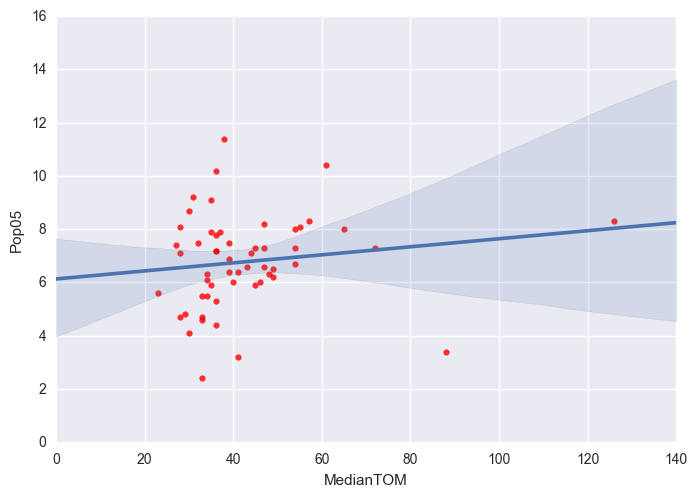

In [20]:
sns.regplot(ranks2.MedianTOM ,ranks2.Pop05,order=1,scatter_kws={'color':'r'})

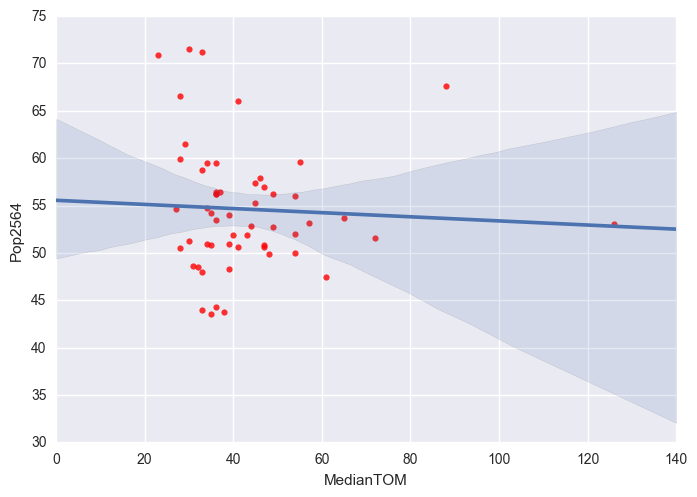

In [21]:
sns.regplot(ranks2.MedianTOM ,ranks2.Pop2564,order=1,scatter_kws={'color':'r'})

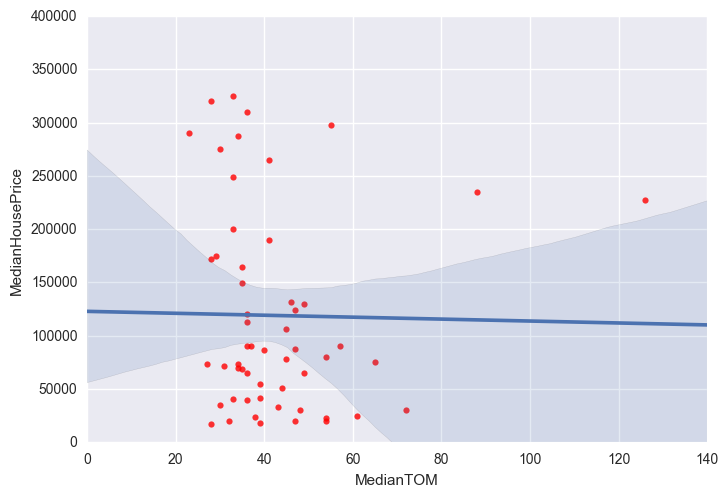

In [22]:
sns.regplot(ranks_1.MedianTOM ,ranks_1.MedianHousePrice,order=1,scatter_kws={'color':'r'})

plt.ylim(ymin=0);

In [23]:
income_price=pd.DataFrame()
income_price["Neighbourhood"]=pd.Series(comm)
income=rankings_data["Median Household Income (2010-2014)"]
income=[i.replace("$", "") for i in income]
income=[i.replace(",", "") for i in income]
income=[float(i) for i in income]
income_price["MedianIncome"]=pd.Series(income)
income_price["MedianPrice"]=pd.Series(median_price)

In [24]:
type(income_price["MedianIncome"][0])

numpy.float64

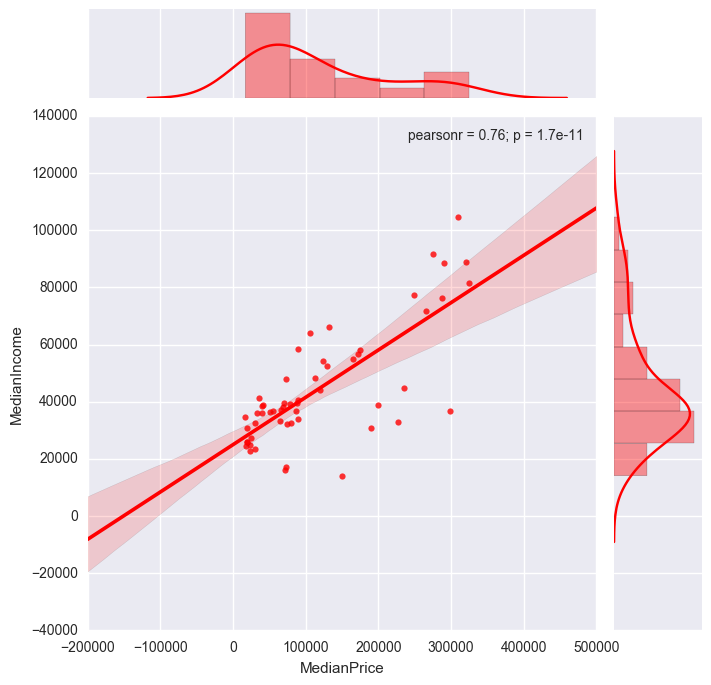

In [25]:
g=sns.jointplot("MedianPrice", "MedianIncome", data=income_price, kind="reg", color="r", size=7)

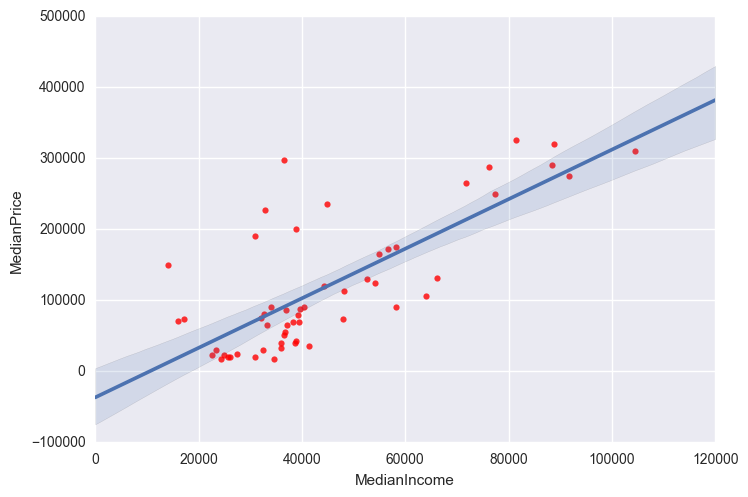

In [26]:
sns.regplot(income_price.MedianIncome,income_price.MedianPrice,order=1,scatter_kws={'color':'r'})

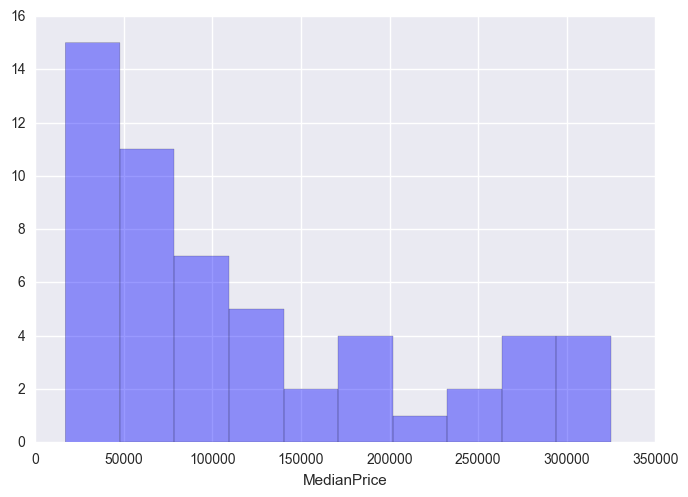

In [27]:
sns.distplot(income_price["MedianPrice"], kde=False, color="b",bins=10)

In [28]:
bpl=pd.Series(rankings_data['Percent of Family Households Living Below the Poverty Line (2010-2014)'])
bpl_rank=pd.DataFrame()
bpl_rank["Neighbourhood"]=pd.Series(comm)
bpl_rank["BPL"]=bpl
bpl_ranked=bpl_rank.sort_values(by="BPL",ascending=True)

In [29]:
bpl_ranked.to_csv("BPL_ranks.csv")

In [30]:
owner_occ=rankings_data["Percentage of Housing Units that are Owner-Occupied (2014)]

In [31]:
type(owner_occ[0])

numpy.float64

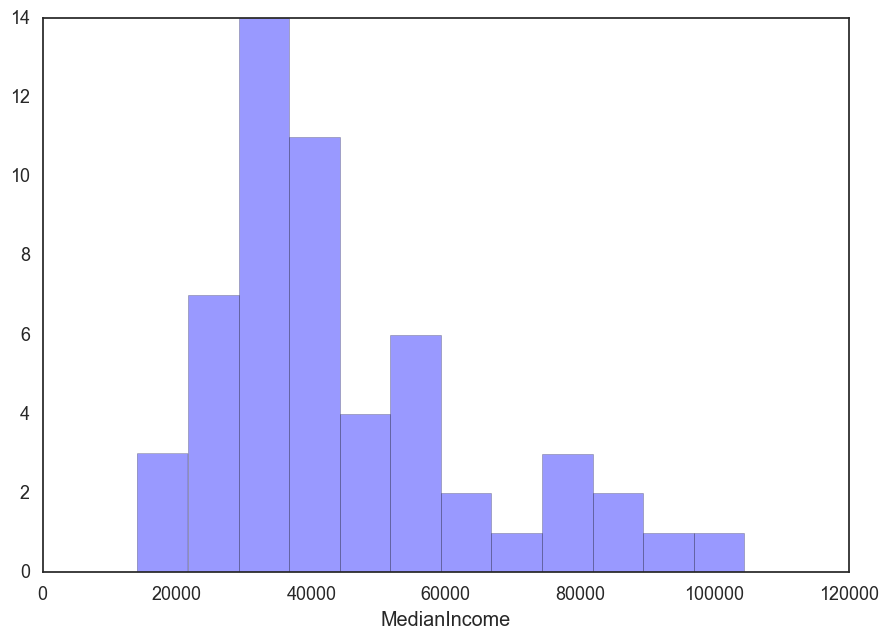

In [45]:

sns.distplot(income_price["MedianIncome"], kde=False, color="b",bins=12)

In [60]:
income_ranks=pd.DataFrame()
income_ranks["Neighbourhood"]=income_price["Neighbourhood"]
income_ranks["Median Income"]=income_price["MedianIncome"]

In [61]:
income_ranked=income_ranks.sort_values(by="Median Income",ascending=False)
income_ranked["Rank"]=pd.Series(list(range(1,len(income_ranked["Neighbourhood"]))))

In [62]:
income_ranked

,Neighbourhood,Median Income,Rank
21,Greater Roland Park/Poplar Hill,104481.89,22.0
4,Canton,91735.65,5.0
29,Inner Harbor/Federal Hill,88854.21,30.0
47,South Baltimore,88487.05,48.0
38,North Baltimore/Guilford/Homeland,81450.63,39.0
15,Fells Point,77433.38,16.0
37,Mount Washington/Coldspring,76262.58,38.0
27,Highlandtown,71660.18,28.0
30,Lauraville,66195.71,31.0
24,Hamilton,63986.00,25.0


In [68]:
income_ranked["Population b/w age 0-5"]=rankings_data['Percent of Population 0-5 years old (2010)']
income_ranked["Population b/w age 6-18"]=rankings_data['Percent of Population 6-18 years old (2010)']
income_ranked["Population b/w age 19-24"]=rankings_data['Percent of Population 19-24 years old (2010)']
income_ranked["Population b/w age 25-64"]=rankings_data['Percent of Population 25-64 years old (2010)']
income_ranked["Population b/w age 64+"]=rankings_data['Percent of Population 65 years and over (2010)']

In [69]:
income_top10=income_ranked.head(10)

In [70]:
income_top10

,Neighbourhood,Median Income,Rank,Population b/w age 0-5,Population b/w age 6-18,Population b/w age 19-24,Population b/w age 25-64,Population b/w age 64+
21,Greater Roland Park/Poplar Hill,104481.89,22.0,4.4,14.5,6.5,56.2,18.4
4,Canton,91735.65,5.0,4.1,3.0,10.5,71.5,10.9
29,Inner Harbor/Federal Hill,88854.21,30.0,4.7,4.8,13.3,66.6,10.6
47,South Baltimore,88487.05,48.0,5.6,5.0,10.4,70.9,8.2
38,North Baltimore/Guilford/Homeland,81450.63,39.0,4.6,10.3,28.2,44.0,12.8
15,Fells Point,77433.38,16.0,4.7,5.0,11.3,71.2,7.7
37,Mount Washington/Coldspring,76262.58,38.0,6.3,13.8,4.2,59.5,16.1
27,Highlandtown,71660.18,28.0,6.4,7.8,10.6,66.0,9.2
30,Lauraville,66195.71,31.0,6.0,16.6,8.9,57.9,10.6
24,Hamilton,63986.00,25.0,5.9,17.5,8.4,57.4,10.9


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

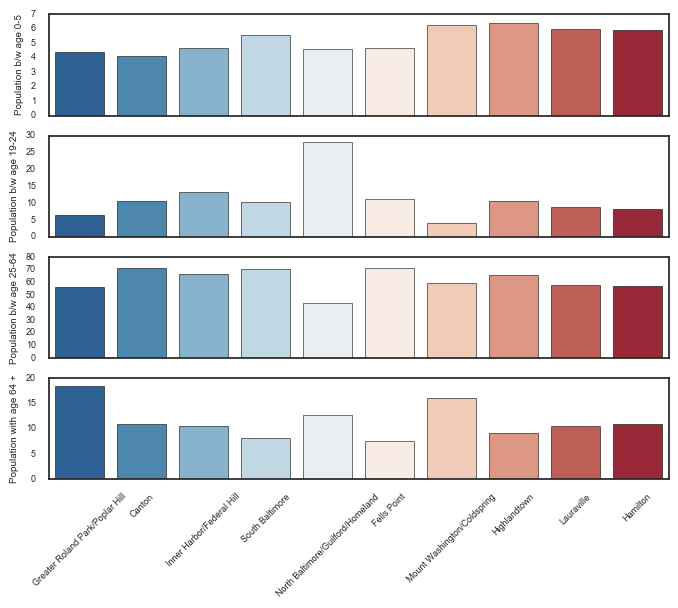

In [86]:
sns.set(style="white", context="talk",font_scale=0.5)

# Set up the matplotlib figure
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 6), sharex=True)

# Generate some sequential data
x = np.array(income_top10["Neighbourhood"])
y1 = income_top10["Population b/w age 0-5"]
sns.barplot(x, y1, palette="RdBu_r", ax=ax1)
ax1.set_ylabel("Population b/w age 0-5")

# Center the data to make it diverging
y2 = income_top10["Population b/w age 19-24"]
sns.barplot(x, y2, palette="RdBu_r", ax=ax2)
ax2.set_ylabel("Population b/w age 19-24")

# Randomly reorder the data to make it qualitative
y3 = income_top10["Population b/w age 25-64"]
sns.barplot(x, y3, palette="RdBu_r", ax=ax3)
ax3.set_ylabel("Population b/w age 25-64")

y4 = income_top10["Population b/w age 64+"]
sns.barplot(x, y4, palette="RdBu_r", ax=ax4)
ax4.set_ylabel("Population with age 64 +")

plt.xticks(rotation=45)

In [89]:
baseline=pd.read_csv("baseline_model.csv")

In [91]:
baseline.head(10)

,CSA2010,Median Number of Days on the Market (2014),Median Price of Homes Sold (2014),Median Prices Z Score,Median Days Z Score,Score
0,Inner Harbor/Federal Hill,28,320000,2.153482,-0.898578,3.052060
1,South Baltimore,23,289900,1.830947,-1.203274,3.034221
2,North Baltimore/Guilford/Homeland,33,325000,2.207059,-0.593881,2.800940
3,Greater Roland Park/Poplar Hill,36,310000,2.046328,-0.411063,2.457391
4,Canton,30,275000,1.671287,-0.776699,2.447986
5,Mount Washington/Coldspring,34,287000,1.799872,-0.532942,2.332814
6,Fells Point,33,249000,1.392685,-0.593881,1.986566
7,Highlandtown,41,265000,1.564132,-0.106367,1.670499
8,Patterson Park North & East,28,172000,0.567596,-0.898578,1.466174
9,Midtown,33,200000,0.867628,-0.593881,1.461510


In [92]:
baseline.tail(10)

,CSA2010,Median Number of Days on the Market (2014),Median Price of Homes Sold (2014),Median Prices Z Score,Median Days Z Score,Score
45,Claremont/Armistead,57,90000,-0.311071,0.868662,-1.179732
46,Pimlico/Arlington/Hilltop,48,30000,-0.953997,0.320208,-1.274206
47,Southern Park Heights,47,19900,-1.062223,0.259269,-1.321492
48,Downtown/Seton Hill,88,235250,1.245348,2.757780,-1.512432
49,Southwest Baltimore,54,23250,-1.026327,0.685844,-1.712171
50,Greater Rosemont,54,20000,-1.061152,0.685844,-1.746996
51,Southeastern,65,75000,-0.471802,1.356176,-1.827979
52,Madison/East End,61,25000,-1.007575,1.112419,-2.119994
53,Greenmount East,72,30000,-0.953997,1.782751,-2.736749
54,Dickeyville/Franklintown,126,227550,1.162839,5.073473,-3.910634
